In [187]:
from Bio import AlignIO
from Bio import SeqIO 
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import os

In [162]:
fasta1 = '/home/davidsong/4220_final/bat_seq/S/DQ084199_S.fasta'
fasta2 = '/home/davidsong/4220_final/bat_seq/S/GU190215_S.fasta'

In [11]:
codon_table = {
        'A': ('GCT', 'GCC', 'GCA', 'GCG'),
        'C': ('TGT', 'TGC'),
        'D': ('GAT', 'GAC'),
        'E': ('GAA', 'GAG'),
        'F': ('TTT', 'TTC'),
        'G': ('GGT', 'GGC', 'GGA', 'GGG'),
        'H': ('CAT', 'CAC'),
        'I': ('ATT', 'ATC', 'ATA'),
        'K': ('AAA', 'AAG'),
        'L': ('TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'),
        'M': ('ATG',),
        'N': ('AAT', 'AAC'),
        'P': ('CCT', 'CCC', 'CCA', 'CCG'),
        'Q': ('CAA', 'CAG'),
        'R': ('CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'),
        'S': ('TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'),
        'T': ('ACT', 'ACC', 'ACA', 'ACG'),
        'V': ('GTT', 'GTC', 'GTA', 'GTG'),
        'W': ('TGG',),
        'Y': ('TAT', 'TAC')
    }

In [114]:
polarity = {
        "hydrophobic": ['I', 'V', 'L', 'F', 'C', 'M', 'A', 'W', 'Y'],
        "hydrophilic": ['N', 'D', 'Q', 'E', 'K', 'R', 'H', 'S', 'T'],
        "NA": ['-', 'G', 'P', ]
}

In [166]:
def translate_fasta(fasta):
    f = SeqIO.parse(fasta, 'fasta')
    list_aa = []
    for row in f:
        codons = [str(row.seq[i:i+3]) for i in range(0, len(row.seq), 3)]
        list_aa = []
        for c in codons:
            if "-" not in c:
                list_aa += [key for key, value in codon_table.items() if c in value]
            else:
                list_aa.append("-")
    return list_aa

In [169]:
f1 = translate_fasta(fasta1)
f2 = translate_fasta(fasta2)

In [182]:
def get_hydrophobicity_values(aa):
    property_list = []
    for row in aa:
        for x in row:
            property_list += [key for key, value in polarity.items() if x in value]
    phobicity_list = []
    for prop in property_list:
        if prop == "hydrophobic":
            phobicity_list.append(1)
        elif prop == "hydrophilic":
            phobicity_list.append(-1)
        else:
            phobicity_list.append(0)
    return phobicity_list

In [185]:
a = get_hydrophobicity_values(f1)
b = get_hydrophobicity_values(f2)

In [189]:
def plot_hydrophobicity_curve(start, end, fasta1, fasta2):
    aa1 = translate_fasta(fasta1)
    aa2 = translate_fasta(fasta2)
    y1 = get_hydrophobicity_values(aa1)
    y2 = get_hydrophobicity_values(aa2)
    x = list(range(start, end))
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle("Hydrophobicity plot comparisons")
    ax1.plot(x, y1[start:end])
    ax1.set_xlabel(os.path.basename(fasta1))
    ax2.plot(x, y2[start:end])
    ax2.set_xlabel(os.path.basename(fasta2))

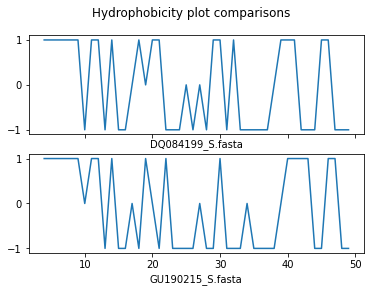

In [190]:
plot_hydrophobicity_curve(4, 50, fasta1, fasta2)

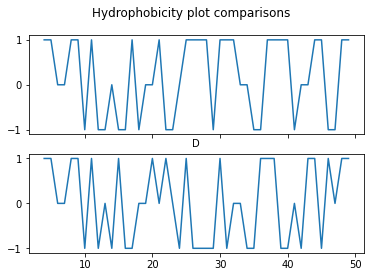

In [161]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Hydrophobicity plot comparisons")
ax1.plot(z, phobicity_list[0][4:50])
ax1.set_xlabel("D")
ax2.plot(z, phobicity_list[1][4:50])